In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import math

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# To download dataset
import gdown

urls = [
    "https://drive.google.com/uc?export=download&id=1RC5_cySlvSmDrkO9xyBM4d0WWF7FuXUm",
    "https://drive.google.com/uc?export=download&id=1q8KIg7yzzygG-bRfIrtXo5rM-yn9nLc6",
    "https://drive.google.com/uc?export=download&id=1-zKltf1XJKMEW51kOWVHGIRJDLV5Siih"
]

names = [
    "(Q1)regression_data_multilinear_group_16_train.txt",
    "(Q2)regression_data_multiGen_group_16_train.txt",
    "(Q3)regression_data_uni_group_16_train.txt"
]

for i in range(3):
  url = urls[i]
  name = names[i]
  gdown.download(url, name, quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1RC5_cySlvSmDrkO9xyBM4d0WWF7FuXUm
To: /content/(Q1)regression_data_multilinear_group_16_train.txt
100%|██████████| 3.58M/3.58M [00:00<00:00, 180MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1q8KIg7yzzygG-bRfIrtXo5rM-yn9nLc6
To: /content/(Q2)regression_data_multiGen_group_16_train.txt
100%|██████████| 1.35M/1.35M [00:00<00:00, 115MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1-zKltf1XJKMEW51kOWVHGIRJDLV5Siih
To: /content/(Q3)regression_data_uni_group_16_train.txt
100%|██████████| 821k/821k [00:00<00:00, 90.1MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=10t-21VUOq47dhSCmh5Ap96F7mo7Eag0O
To: /content/binary_class_classification_data_group_16_train.txt
100%|██████████| 2.74M/2.74M [00:00<00:00, 196MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1u41LqeqwgJ4WKsSEOh7b8mDpOJ4dlQIn
To: /content/multi_class_classificati

In [ ]:
np.random.seed(seed=42)

# **Q1: Multi-Linear Regression**

## Loading and Splitting Data

In [ ]:
# file_path = '/content/drive/MyDrive/Assignment Data/PRNN/A1/(Q1)regression_data_multilinear_group_16_train.txt'
file_path = '/content/(Q1)regression_data_multilinear_group_16_train.txt'
data = np.loadtxt(file_path, delimiter='\t', skiprows=1)

In [ ]:
train_ratio = 0.8
np.random.shuffle(data)
split_index = int(train_ratio * len(data))

train_data = data[:split_index]
test_data = data[split_index:]

In [ ]:
x_train_data = train_data[:, :-3]  # Feature Vector
y_train_data = train_data[:,-3:]   # Target Vector

x_test_data = test_data[:, :-3]  # Feature Vector
y_test_data = test_data[:,-3:]   # Target Vector

## Helper Functions

In [ ]:
def add_bias(feature):
  return np.insert(feature, 0, 1, axis=1)

In [ ]:
def least_squares(feature, target):
  temp = np.linalg.inv(feature.T@feature)
  beta = temp@feature.T@target
  weight = beta[1:]
  bias = beta[:1]
  prediction = feature@beta
  return  weight.reshape(-1,1),bias.reshape(-1,1),prediction.reshape(-1,1)

def linear_regression(feature,target):
  feature = add_bias(feature)
  x,y,z = least_squares(feature,target)
  return x,y,z

## Linear regression

In [ ]:
def multi_linear_regression(feature, target):
  feature = add_bias(feature)
  temp = np.linalg.inv(feature.T @ feature)
  beta = temp@feature.T @ target
  prediction = feature @ beta
  return beta, prediction

## Functions to evaluate and visualize predictions

In [ ]:
def calculate_regression_metrics_3d(actual_values, predicted_values):
    mse = np.mean((actual_values - predicted_values) ** 2, axis=0)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(actual_values - predicted_values), axis=0)
    covariances = np.cov(actual_values.T, predicted_values.T, bias=True)
    var_actual = np.diag(covariances)[:actual_values.shape[1]]
    var_predicted = np.diag(covariances)[actual_values.shape[1]:]
    std_actual = np.sqrt(var_actual)
    std_predicted = np.sqrt(var_predicted)
    r = np.zeros(actual_values.shape[1])
    for i in range(actual_values.shape[1]):
        r[i] = covariances[i, actual_values.shape[1] + i] / (std_actual[i] * std_predicted[i])
    return mse, rmse, mae, r

In [ ]:
def multi_validate(valid_features, weights):
  valid_features = add_bias(valid_features)
  predictions = valid_features @ weights

  return predictions

In [ ]:
def plot_multilinear_regression_results(actual_values, predicted_values):
    n_dimensions = actual_values.shape[1]
    fig, axs = plt.subplots(1, n_dimensions, figsize=(5*n_dimensions, 5))
    for i in range(n_dimensions):
        wc,bc,_ = linear_regression(y_train_data[:, i].reshape(-1,1),prediction[:, i].reshape(-1,1))
        ax = axs[i]
        ax.scatter(actual_values[:, i], predicted_values[:, i], color='r',edgecolor = 'black',marker='o')
        ax.plot(actual_values[:, i], actual_values[:, i], color='black', label='Perfect Prediction')
        ax.plot(actual_values[:, i], wc[0] * actual_values[:, i] + bc[0], color='yellow', label='Line of Best Fit')
        ax.set_xlabel('Target Actual')
        ax.set_ylabel('Target Predicted ')
        ax.set_title(f'Dimension {i+1}')
        ax.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_multilinear_regression_results_3d(actual_values, predicted_values):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(actual_values[:, 0], actual_values[:, 1], actual_values[:, 2], color='yellow', label='Actual',alpha = 0.2)
    ax.scatter(predicted_values[:, 0], predicted_values[:, 1], predicted_values[:, 2], color='skyblue',edgecolor='black', label='Predicted')
    ax.set_xlabel('Dimension 1', fontsize=12)
    ax.set_ylabel('Dimension 2', fontsize=12)
    ax.set_zlabel('Dimension 3', fontsize=12)
    ax.set_title('Multilinear Regression Results', fontsize=14)
    ax.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

## Training

In [ ]:
weights, prediction = multi_linear_regression(x_train_data, y_train_data)
mse, rmse, mae, r = calculate_regression_metrics_3d(y_train_data, prediction)

print('Results for regression on all targets simultaneously (Y)\n\n')
print(f'Weight(W)):[{weights.shape[0]}X{weights.shape[1]}] (includes) \n\n {weights}\n')
print(f'Y_pred = XW + B\n')

print(f"Training Results:")
print(f"Mean Squared Error (MSE) = {mse}")
print(f"Root Mean Squared Error(RMSE) = {rmse}")
print(f"Mean Absolute Error (MAE) = {mae}")
print(f"Pearson Correlation coefficient (r) = {r}\n\n")

Results for regression on all targets simultaneously (Y)


Weight(W)):[11X3] (includes) 

 [[-2.83055424 -4.21426824  0.68125074]
 [ 0.35662321  2.09660842 -0.29961044]
 [ 0.57250313 -3.43256268 -1.8493139 ]
 [-4.57893052 -2.40456644 -4.56931149]
 [-1.47968052 -2.01254804  2.53627787]
 [-2.72173965  1.93956251  0.39162743]
 [ 1.95290599 -0.3824572   2.63026673]
 [-3.27466497 -2.86724324  2.89805141]
 [-4.27950996 -0.55760121 -4.24861482]
 [ 4.32466867 -3.78125771  1.63091306]
 [ 0.60237864  4.21385122 -4.4327477 ]]

Y_pred = XW + B

Training Results:
Mean Squared Error (MSE) = [8.41442387 8.39231758 8.46196675]
Root Mean Squared Error(RMSE) = [2.90076264 2.8969497  2.90894599]
Mean Absolute Error (MAE) = [2.31586145 2.30702191 2.31783515]
Pearson Correlation coefficient (r) = [0.89877737 0.91753214 0.94009805]




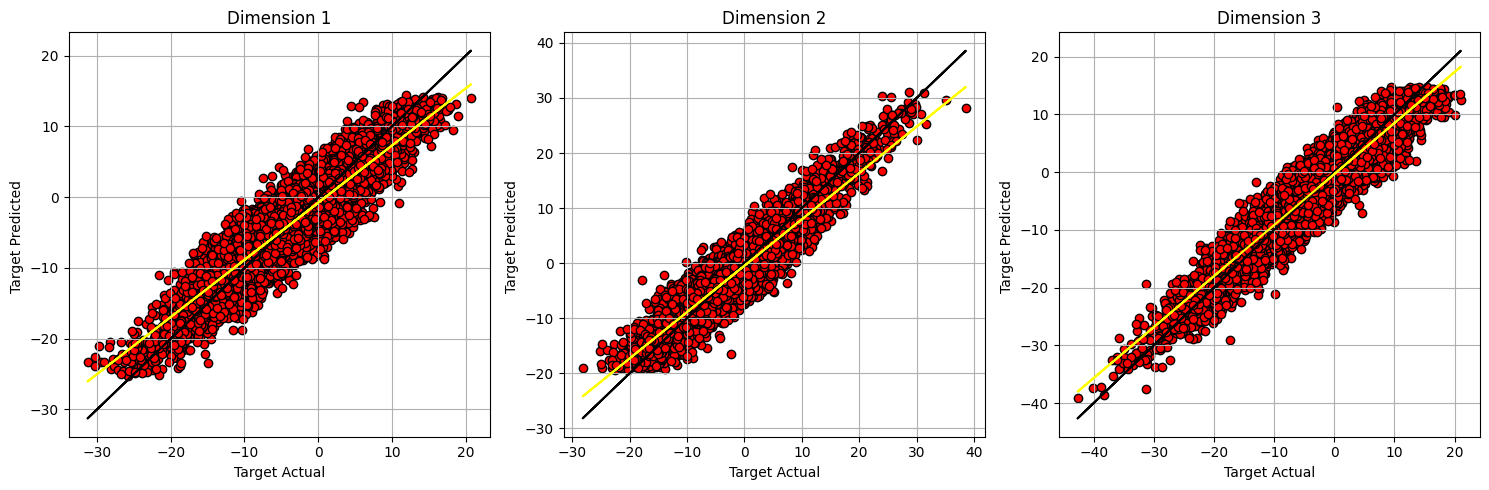

In [ ]:
plot_multilinear_regression_results(y_train_data, prediction)

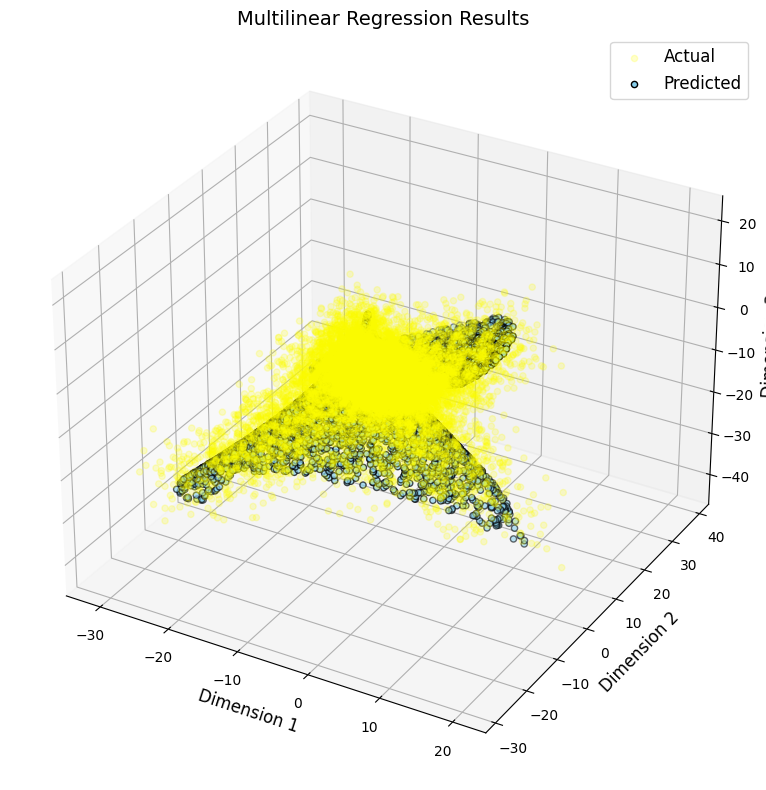

In [ ]:
plot_multilinear_regression_results_3d(y_train_data, prediction)

## Validating

In [ ]:
test_predictions = multi_validate(x_test_data, weights)
mse, rmse, mae, r = calculate_regression_metrics_3d(y_test_data, test_predictions)

print('Results for regression on all targets simultaneously (Y)\n\n')

print(f"Test Results:")
print(f"Mean Squared Error (MSE) = {mse}")
print(f"Root Mean Squared Error(RMSE) = {rmse}")
print(f"Mean Absolute Error (MAE) = {mae}")
print(f"Pearson Correlation coefficient (r) = {r}\n\n")

Results for regression on all targets simultaneously (Y)


Test Results:
Mean Squared Error (MSE) = [8.07175015 8.34824924 8.48268634]
Root Mean Squared Error(RMSE) = [2.84108257 2.8893337  2.91250517]
Mean Absolute Error (MAE) = [2.26720687 2.3081215  2.32734142]
Pearson Correlation coefficient (r) = [0.91202753 0.91670577 0.94614152]




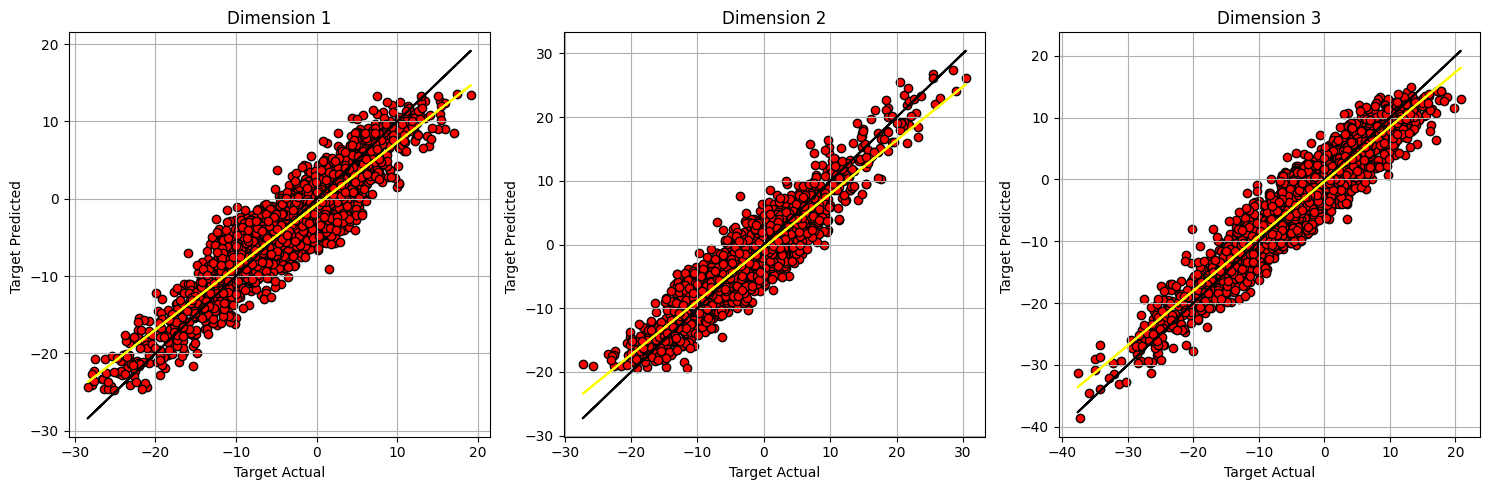

In [ ]:
plot_multilinear_regression_results(y_test_data, test_predictions)

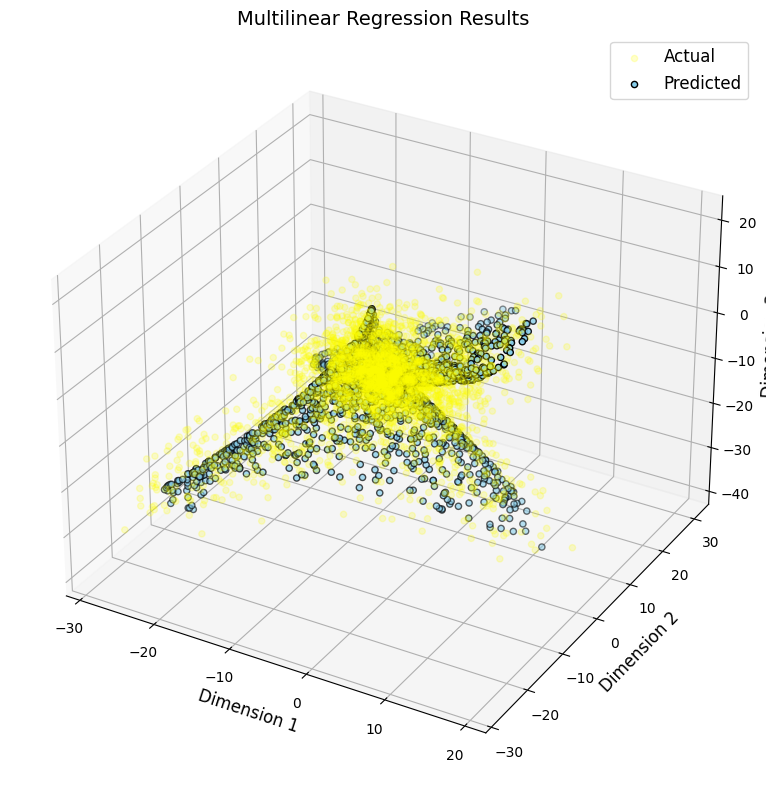

In [ ]:
plot_multilinear_regression_results_3d(y_test_data, test_predictions)

# **Q2 Generalised Regression (with polynomial kernel)**

## Loading and Splitting data

In [ ]:
# file_path = '/content/drive/MyDrive/Assignment Data/PRNN/A1/(Q2)regression_data_multiGen_group_16_train.txt'
file_path = '/content/(Q2)regression_data_multiGen_group_16_train.txt'
data = np.loadtxt(file_path, delimiter='\t', skiprows=1)

In [ ]:
train_ratio = 0.8
np.random.shuffle(data)
split_index = int(train_ratio * len(data))
train_data = data[:split_index]
test_data = data[split_index:]

In [ ]:
x_train_data = train_data[:, :-3]  # Feature Vector
y_train_data = train_data[:, -3:]  # Target Vector

x_test_data = test_data[:, :-3]  # Feature Vector
y_test_data = test_data[:, -3:]  # Target Vector

## Helper Functions

Approach 1: k-degree polynomial without cross terms

$$ e.g.(degree\ k):\quad [\ x_1\quad x_2\ ] \rightarrow [\ 1\quad  x_1\quad x_1^2\quad \ldots x_1^k\quad x_2\quad x_2^2\quad \ldots\ x_2^k\ ] $$

In [ ]:
def transform_1(data, degree=3):
  if degree == 0 : return data
  phi_data = np.array([])
  for k in range(data.shape[0]):
    x = data[k].reshape(-1, 1)
    phi_x = np.ones((1,1))
    for j in range(x.shape[0]):
      for i in range(1,degree+1):
        new_term = np.array([[(x[j][0] ** i)]])
        phi_x = np.concatenate((phi_x,new_term), axis = 1)
    if phi_data.size == 0:
        phi_data = phi_x
    else:
        phi_data = np.concatenate((phi_data, phi_x), axis=0)
  return phi_data

Approach 2: k-degree polynomial with cross terms

$$ e.g.(degree\ 3):\quad [\ x_1 \quad x_2\ ] \rightarrow [\ 1\quad x_1\quad x_2\quad x_1^2\quad x_2^2\quad x_1x_2\quad x_1^3\quad x_2^3\quad x_1^2x_2\quad x_1x_2^2\ ] $$

In [ ]:
def factorize(degree, variable, current_distribution=None, distributions=None):
    if current_distribution is None:
        current_distribution = [0] * variable
    if distributions is None:
        distributions = []
    if degree == 0:
        distributions.append(tuple(current_distribution))
    elif variable == 1:
        current_distribution[-1] = degree
        distributions.append(tuple(current_distribution))
    else:
        for i in range(degree + 1):
            current_distribution[-variable] = i
            factorize(degree - i, variable - 1, current_distribution[:], distributions)
    return distributions

In [ ]:
def transform_2(data, degree=3):
  if degree == 0 : return data
  phi_data = np.array([])
  for k in range(data.shape[0]):
    x = data[k].reshape(-1, 1)
    phi_x = np.ones((1,1))
    for i in range(1,degree+1):
      arrangements = factorize(i,x.shape[0])
      for t in arrangements:
        prod = 1
        for m in range(len(t)):
          prod *= x[m][0] ** t[m]
        new_term = np.array([[prod]])
        phi_x = np.concatenate((phi_x,new_term), axis = 1)
    if phi_data.size == 0:
        phi_data = phi_x
    else:
        phi_data = np.concatenate((phi_data, phi_x), axis=0)
  return phi_data

## Polynomial Regression by Gradient Descent

In [ ]:
def gradient_descent_3d(data, target, threshold = 0.0001):
  w = np.random.rand(data.shape[1],target.shape[1])
  grad_w = data.T@data@w - data.T@target
  norm = np.linalg.norm(grad_w.reshape(-1))
  grad_w /= norm
  iter = 0;A = data.T@data ; B = data.T@target ; H = 2*A
  while np.linalg.norm(A@w - B) > threshold:
    grad_w = A@w - B
    num = np.trace(grad_w.T@grad_w)
    den = np.trace(grad_w.T@H@grad_w)
    alpha = num/den
    w = w - alpha*grad_w
    iter += 1
  print("Gradient Descent Complete\n")
  print(f'Total Iteration:{iter},   ||grad(w)||: {np.linalg.norm(A@w - B)}\n\n')
  return w, iter

In [ ]:
def polynomial_regression_3d(feature, target, transform = transform_2, degree = 3, threshold = 0.0001):
  transformed_feature = transform(feature,degree)
  beta, _ = gradient_descent_3d(transformed_feature, target, threshold)
  prediction = transformed_feature @ beta
  return beta, prediction

## Functions to evaluate and visualize predictions

In [ ]:
def poly_multi_validate(valid_features, weights, transform = transform_2, degree = 3):
  transformed_feature = transform(valid_features, degree)
  predictions = transformed_feature @ weights

  return predictions

In [ ]:
def plot_multilinear_poly_regression_results(actual_values, predicted_values):
    n_dimensions = actual_values.shape[1]
    fig, axs = plt.subplots(1, n_dimensions, figsize=(5*n_dimensions, 5))
    for i in range(n_dimensions):
        wc,bc,_ = linear_regression(y_train_data[:, i].reshape(-1,1),prediction[:, i].reshape(-1,1))
        ax = axs[i]
        ax.scatter(actual_values[:, i], predicted_values[:, i], color='yellow',edgecolor = 'red',marker='o')
        ax.plot(actual_values[:, i], actual_values[:, i], color='blue', linestyle='--', label='Perfect Prediction')
        ax.plot(actual_values[:, i], wc[0] * actual_values[:, i] + bc[0], color='black', label='Line of Best Fit')
        ax.set_xlabel('Target Actual')
        ax.set_ylabel('Target Predicted ')
        ax.set_title(f'Dimension {i+1}')
        ax.legend()
        ax.grid(True)
    plt.tight_layout()
    plt.show()

## Training

In [ ]:
weights, prediction = polynomial_regression_3d(x_train_data, y_train_data, transform_2,4)
mse, rmse, mae, r = calculate_regression_metrics_3d(y_train_data,prediction)

print('Results for regression on all targets simultaneously (Y)\n\n')
print(f'Weight(W)):[{weights.shape[0]}X{weights.shape[1]}] (includes bias) \n\n {weights}\n')
print(f'Y_pred = XW + B\n')

print(f"Training Results:")
print(f"Mean Squared Error (MSE) = {mse}")
print(f"Root Mean Squared Error(RMSE) = {rmse}")
print(f"Mean Absolute Error (MAE) = {mae}")
print(f"Pearson Correlation coefficient (r) = {r}\n\n")

Gradient Descent Complete

Total Iteration:439,   ||grad(w)||: 9.67945752795922e-05


Results for regression on all targets simultaneously (Y)


Weight(W)):[15X3] (includes bias) 

 [[-2.812851   -4.25039495  0.56413272]
 [-1.43423654 -2.00835161  2.49985614]
 [ 0.35747942  2.14755326 -0.25735549]
 [-2.79467974  2.1086614   0.48846086]
 [-3.04611826 -2.93298751  3.01259875]
 [ 0.68632255 -3.53286974 -1.77829841]
 [ 1.93054824 -0.37813412  2.65749571]
 [ 4.34492798 -3.77979418  1.58313664]
 [-4.30251463 -0.56288386 -4.24110762]
 [-4.62194601 -2.45729268 -4.57840936]
 [ 0.03392697 -0.07401506 -0.03303065]
 [-0.10766131  0.04264161  0.00745864]
 [ 0.58480292  4.16641276 -4.45669072]
 [-0.0818931   0.01861017 -0.10551971]
 [-0.06781331  0.05428761 -0.01087916]]

Y_pred = XW + B

Training Results:
Mean Squared Error (MSE) = [8.36677946 8.35506198 8.4930067 ]
Root Mean Squared Error(RMSE) = [2.89253858 2.89051241 2.91427636]
Mean Absolute Error (MAE) = [2.31149625 2.30140415 2.32851395]
Pear

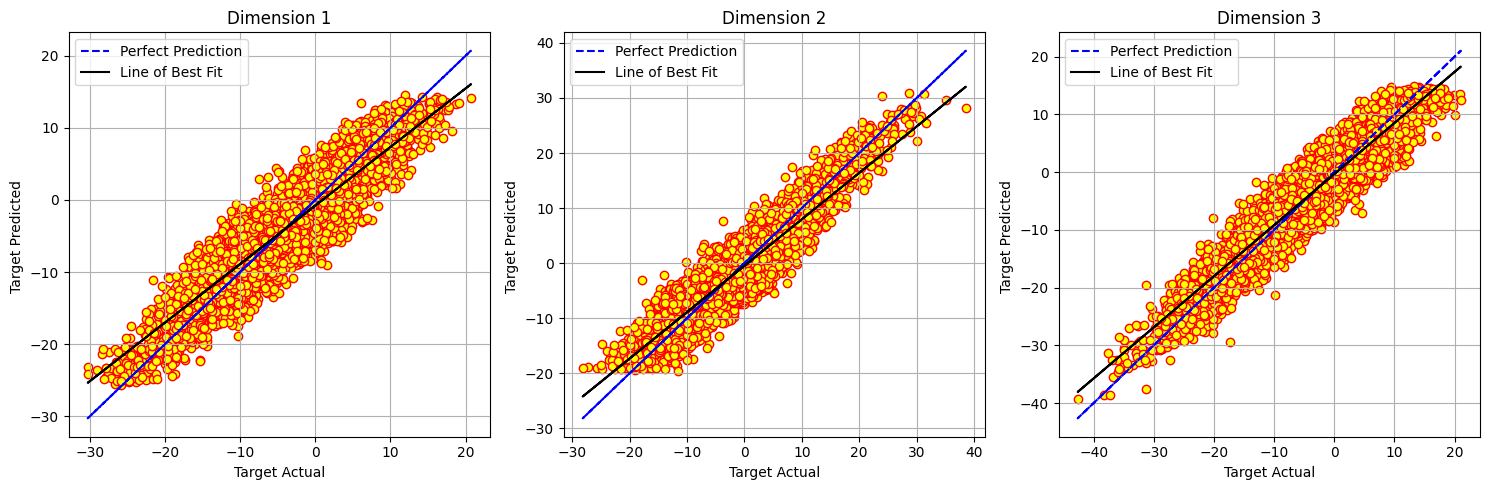

In [ ]:
plot_multilinear_poly_regression_results(y_train_data, prediction)

## Validating

In [ ]:
test_predictions = poly_multi_validate(x_test_data, weights, transform_2, 4)
mse, rmse, mae, r = calculate_regression_metrics_3d(y_test_data, test_predictions)

print('Results for regression on all targets simultaneously (Y)\n\n')

print(f"Validation Results:")
print(f"Mean Squared Error (MSE) = {mse}")
print(f"Root Mean Squared Error(RMSE) = {rmse}")
print(f"Mean Absolute Error (MAE) = {mae}")
print(f"Pearson Correlation coefficient (r) = {r}\n\n")

Results for regression on all targets simultaneously (Y)


Validation Results:
Mean Squared Error (MSE) = [8.24155668 8.48882926 8.3419658 ]
Root Mean Squared Error(RMSE) = [2.87081115 2.91355955 2.88824615]
Mean Absolute Error (MAE) = [2.2819518  2.33067825 2.28177876]
Pearson Correlation coefficient (r) = [0.90412153 0.91464329 0.94414924]




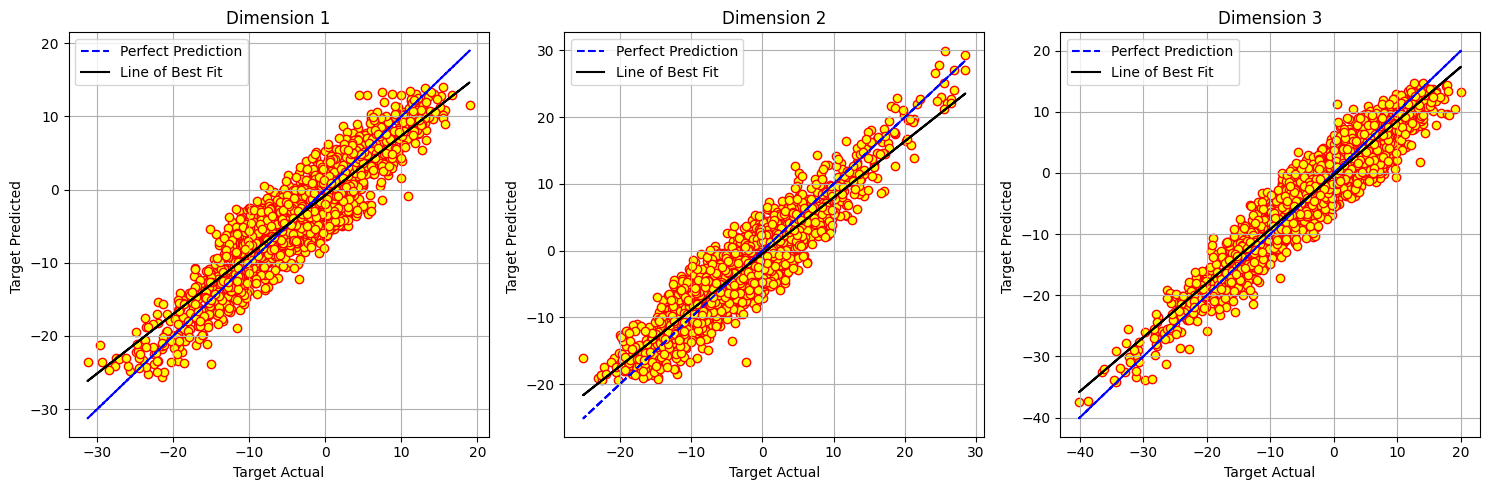

In [ ]:
plot_multilinear_poly_regression_results(y_test_data, test_predictions)

# **Q3 Generalised Regression (with non-polynomial kernel)**

## Loading and Splitting data

In [ ]:
# file_path = '/content/drive/MyDrive/Assignment Data/PRNN/A1/(Q3)regression_data_uni_group_16_train.txt'
file_path = '/content/(Q3)regression_data_uni_group_16_train.txt'
data = np.loadtxt(file_path, delimiter='\t', skiprows=1)

In [ ]:
train_ratio = 0.8
np.random.shuffle(data)
split_index = int(train_ratio * len(data))

train_data = data[:split_index]
test_data = data[split_index:]

In [ ]:
x_train_data = train_data[:, :-1]  # Feature Vector
y_train_data = train_data[:, -1:] # Target

x_test_data = test_data[:, :-1]  # Feature Vector
y_test_data = test_data[:, -1:] # Target

## Visualizing the Data

Variation of y vs each feature

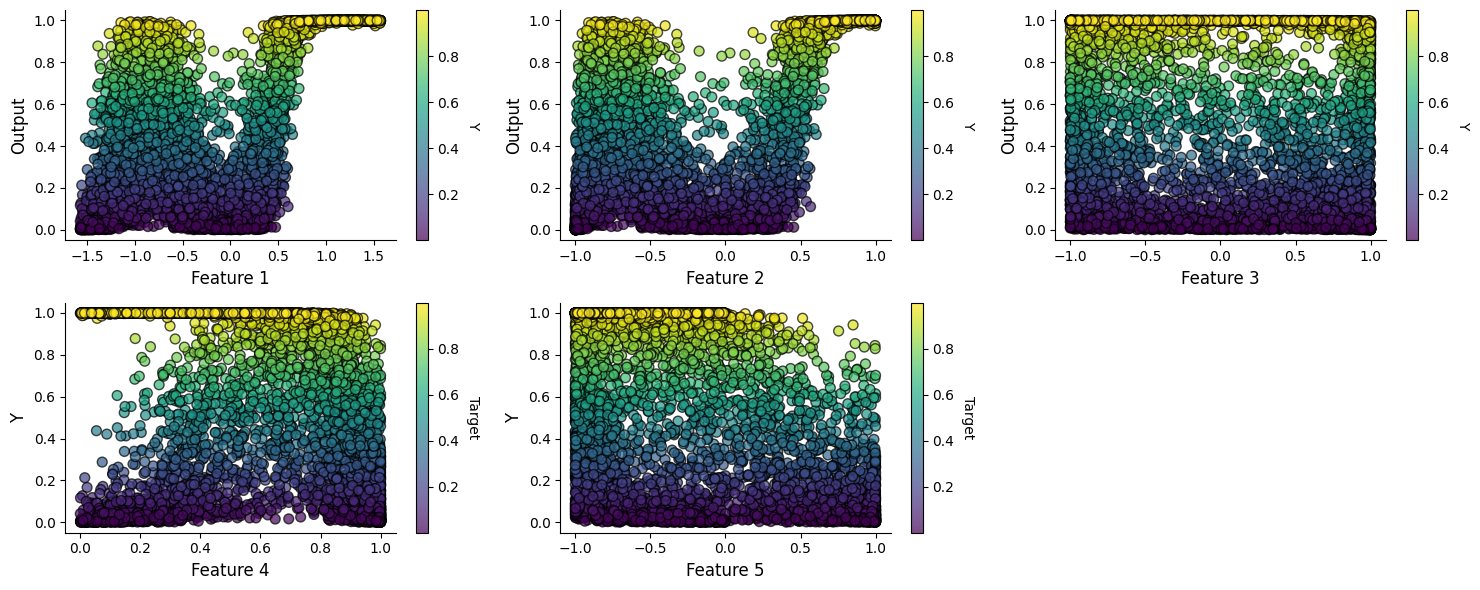

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(15, 6))
for i in range(5):
    if i < 3:
        scatter = axs[0, i].scatter(x_train_data[:, i], y_train_data, c=y_train_data, cmap='viridis', alpha=0.7, s=50, edgecolor='black')
        axs[0, i].set_xlabel(f'Feature {i+1}', fontsize=12)
        axs[0, i].set_ylabel('Output', fontsize=12)
        axs[0, i].tick_params(axis='both', which='major', labelsize=10)
        axs[0, i].spines['top'].set_visible(False)
        axs[0, i].spines['right'].set_visible(False)
        cbar = fig.colorbar(scatter, ax=axs[0, i])
        cbar.set_label('Y', rotation=270, labelpad=15)
    else:
        scatter = axs[1, i-3].scatter(x_train_data[:, i], y_train_data, c=y_train_data, cmap='viridis', alpha=0.7, s=50, edgecolor='black')
        axs[1, i-3].set_xlabel(f'Feature {i+1}', fontsize=12)
        axs[1, i-3].set_ylabel('Y', fontsize=12)
        axs[1, i-3].tick_params(axis='both', which='major', labelsize=10)
        axs[1, i-3].spines['top'].set_visible(False)
        axs[1, i-3].spines['right'].set_visible(False)
        cbar = fig.colorbar(scatter, ax=axs[1, i-3])
        cbar.set_label('Target', rotation=270, labelpad=15)

fig.delaxes(axs[1, 2])

plt.tight_layout()
plt.show()

Variation of each pair of features with y

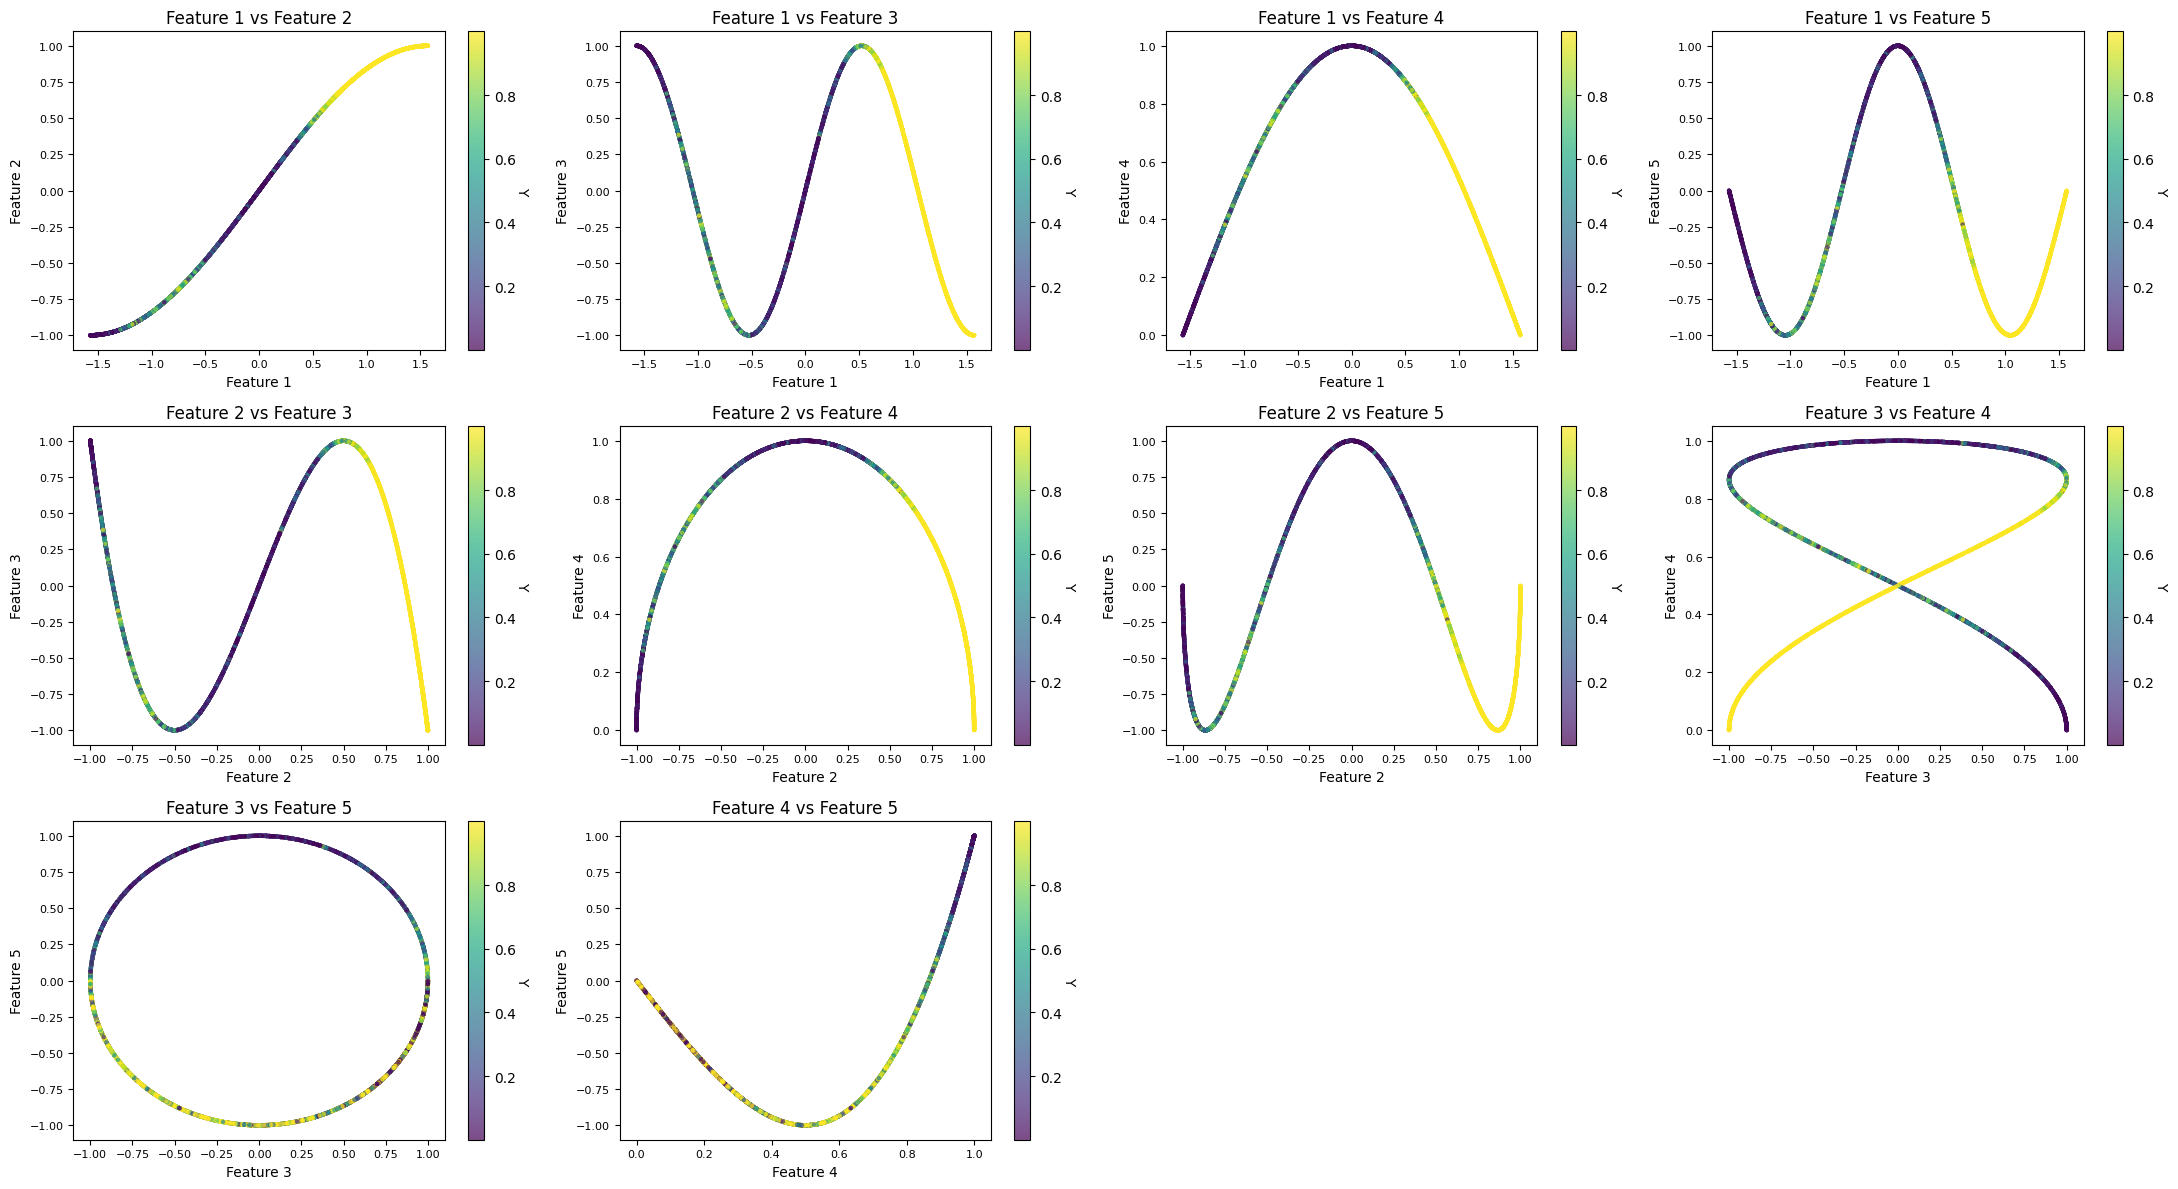

In [ ]:
fig, axs = plt.subplots(3, 4, figsize=(22, 12))
row = 0
col = 0
for i in range(5):
    for j in range(5):
        if i != j and i<j:
            scatter = axs[row, col].scatter(x_train_data[:, i],x_train_data[:, j],c=y_train_data, cmap='viridis', alpha=0.7, s=10, edgecolor='none')
            axs[row, col].set_xlabel(f'Feature {i+1}', fontsize=10)
            axs[row, col].set_ylabel(f'Feature {j+1}', fontsize=10)
            axs[row, col].tick_params(axis='both', which='major', labelsize=8)
            axs[row, col].set_title(f'Feature {i+1} vs Feature {j+1}', fontsize=12)
            cbar = fig.colorbar(scatter, ax=axs[row, col])
            cbar.set_label(f'Y', rotation=270, labelpad=10)
            col += 1
            if col > 3:
                col = 0
                row += 1

fig.delaxes(axs[2, 2])
fig.delaxes(axs[2, 3])

plt.tight_layout()
plt.show()

## Transformation Kernel

Approach 1

In [ ]:
def compute_functions(x):
    sin_x = np.sin(x)
    cos_x = np.cos(x)
    if x > 0:
        log_x = np.log(x)
    else:
        log_x = 0
    exp_x = np.exp(x)
    return np.array([sin_x, cos_x, log_x, exp_x])

In [ ]:
def transform_np_1(data):
  phi_data = np.array([])
  for k in range(data.shape[0]):
    x = data[k].reshape(-1, 1)
    phi_x = np.ones((1,1))
    for j in range(x.shape[0]):
      new_term = compute_functions(x[j][0]).reshape(1,-1)
      phi_x = np.concatenate((phi_x,new_term), axis = 1)
    if phi_data.size == 0:
        phi_data = phi_x
    else:
        phi_data = np.concatenate((phi_data, phi_x), axis=0)
  return phi_data

Approach 2

In [ ]:
def sigmoid(x):
    if x >= 0:
        return 1 / (1 + math.exp(-x))
    else:
        return math.exp(x) / (1 + math.exp(x))

def relu(x,threshold=0):
    if x >threshold:
      if x<=1:
        return x
      else:
        return 1
    else:
      return 0

In [ ]:
def transform_np_2(data):
  phi_data = np.array([])
  for k in range(data.shape[0]):
    x = data[k].reshape(-1, 1)
    phi_x = np.ones((10,1))

    phi_x[0][0] = 1
    phi_x[1][0] = relu(x[0][0] + x[1][0]-0.5)
    phi_x[2][0] = sigmoid(x[0][0] + x[1][0]-0.5)
    phi_x[3][0] = sigmoid(math.atan(x[4][0]/x[2][0]))
    phi_x[4][0] = x[4][0]*x[1][0]*x[4][0]
    phi_x[5][0] = sigmoid(math.tan(x[2][0]/x[0][0]))
    phi_x[6][0] = sigmoid(math.tan(x[2][0]/x[1][0]))
    phi_x[7][0] = sigmoid(x[4][0])
    phi_x[8][0] = sigmoid(max((x[2][0],x[3][0],x[4][0])))
    phi_x[9][0] = sigmoid(max((x[0][0],x[1][0])))

    phi_x = phi_x.reshape(1,-1)
    if phi_data.size == 0:
        phi_data = phi_x
    else:
        phi_data = np.concatenate((phi_data, phi_x), axis=0)
  return phi_data

In [ ]:
def gd(data, target, threshold = 0.0001):
  w = np.random.rand(data.shape[1],1)
  grad_w = data.T@data@w - data.T@target
  norm = np.linalg.norm(grad_w.reshape(-1))
  grad_w /= norm
  iter = 0;A = data.T@data ; B = data.T@target ; H = 2*A
  while np.linalg.norm(A@w - B) > threshold and iter < 500000:
    grad_w = A@w - B
    norm = np.linalg.norm(grad_w.reshape(-1))
    den = grad_w.T@H@grad_w
    alpha = (norm**2)/den
    w = w - alpha*grad_w
    iter += 1
  print("Gradient Descent Complete\n")
  print(f'W : {w.reshape(-1)},\n  Total Iteration:{iter},   ||grad(w)||: {np.linalg.norm(A@w - B)}\n\n')
  return w, iter

In [ ]:
def nonpoly_regression(feature, target, transform = transform_np_2, threshold = 0.0001):
  transformed_feature = transform(feature)
  beta, _ = gd(transformed_feature, target, threshold)
  weight = beta[1:]
  bias = beta[:1]
  prediction = transformed_feature @ beta
  return weight.reshape(-1,1) , bias.reshape(-1,1) , prediction.reshape(-1,1)

In [ ]:
def nonpoly_validate(valid_features, weights, transform = transform_np_2):
  transformed_feature = transform(valid_features)
  predictions = transformed_feature @ weights

  return predictions

## Plotting Function

In [ ]:
def plot_nonpoly_regression(data,prediction):
  coeff = linear_regression(data,prediction)
  plt.figure(figsize=(8, 8))
  plt.scatter(data, prediction, color='lightgreen', edgecolor='green', marker='o')
  plt.plot(data, data, color='blue', linestyle='--', label='Perfect Prediction')
  plt.plot(data, coeff[0] * data + coeff[1], color='black', label='Line of Best Fit')
  plt.title('Regression Plot of Data vs. Prediction')
  plt.xlabel('TARGET ACTUAL')
  plt.ylabel('TARGET PREDICTION')
  plt.legend()
  plt.grid(True)
  plt.show()

## Kernel 1

### Training

Gradient Descent Complete

W : [-9.28169013e+01 -9.09920574e+01 -1.24412846e+01  2.40475916e+01
 -2.83393755e+00 -1.23624469e+00  2.44553011e+01 -2.40477168e+01
  8.30605204e+01  1.88647218e+00  2.43268057e+00  6.11706922e-04
  2.03198925e+00 -2.16455429e+01 -6.95739304e+01  3.04425147e-03
  2.18024901e+01 -2.83526819e+00 -1.55015925e+00 -3.68124880e-03
 -1.48009089e+00],
  Total Iteration:500000,   ||grad(w)||: 0.009387093168110339


Results for regression on TARGET (y)


Weight(w) : [-9.09920574e+01 -1.24412846e+01  2.40475916e+01 -2.83393755e+00
 -1.23624469e+00  2.44553011e+01 -2.40477168e+01  8.30605204e+01
  1.88647218e+00  2.43268057e+00  6.11706922e-04  2.03198925e+00
 -2.16455429e+01 -6.95739304e+01  3.04425147e-03  2.18024901e+01
 -2.83526819e+00 -1.55015925e+00 -3.68124880e-03 -1.48009089e+00]

Bias(b) : [[-92.81690134]]

y_pred = <w,x> + b

Coefficients of line of best fit: Slope = [[0.77364615]] ; Intercept = [[0.1192646]]
y_pred = slope*y_train_data + intercept


Training

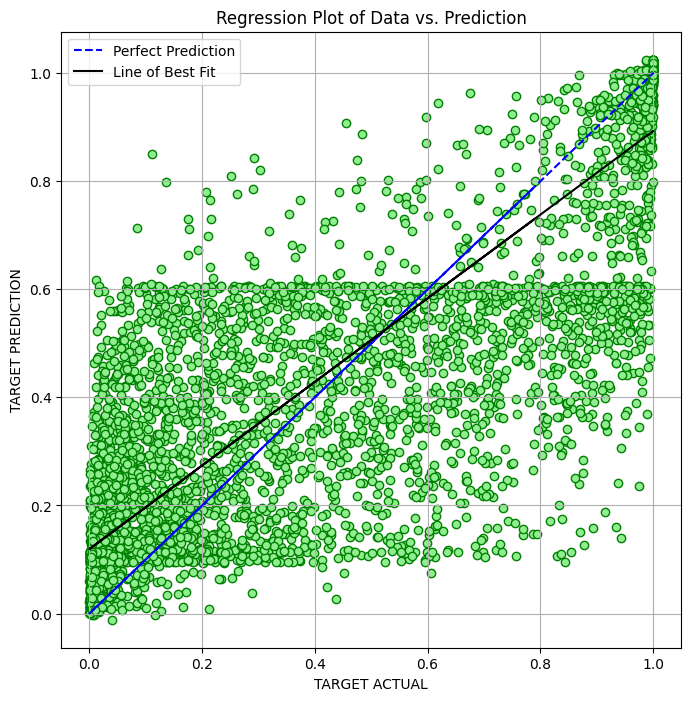

In [ ]:
weight, bias, prediction = nonpoly_regression(x_train_data,y_train_data,transform_np_1)
mse,rmse,mae,r = calculate_regression_metrics_3d(y_train_data, prediction)
c0,c1,_ = linear_regression(y_train_data,prediction)
print('Results for regression on TARGET (y)\n\n')
print(f'Weight(w) : {weight.squeeze()}\n')
print(f'Bias(b) : {bias}\n')
print(f'y_pred = <w,x> + b\n')
print(f'Coefficients of line of best fit: Slope = {c0} ; Intercept = {c1}')
print(f'y_pred = slope*y_train_data + intercept\n\n')

print(f"Training Results:")
print(f"Mean Squared Error (MSE) = {mse}")
print(f"Root Mean Squared Error(RMSE) = {rmse}")
print(f"Mean Absolute Error (MAE) = {mae}")
print(f"Pearson Correlation coefficient (r) = {r}\n\n")

plot_nonpoly_regression(y_train_data,prediction)

### Validation

Validation Results:

Mean Squared Error (MSE) = [0.03709563]
Root Mean Squared Error(RMSE) = [0.19260226]
Mean Absolute Error (MAE) = [0.12961496]
Pearson Correlation coefficient (r) = [0.87728134]




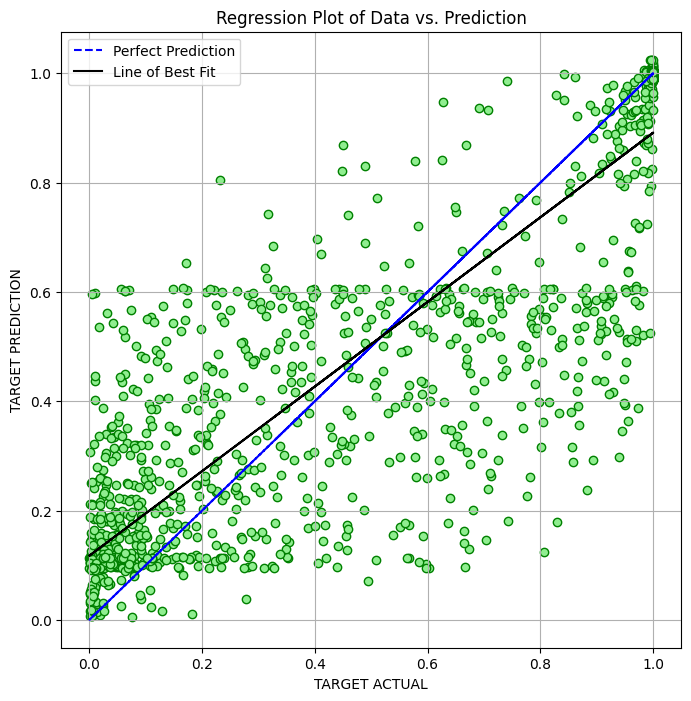

In [ ]:
weights = np.concatenate((bias,weight), axis = 0)
predictions = nonpoly_validate(x_test_data, weights, transform_np_1)
v_mse, v_rmse, v_mae, v_r = calculate_regression_metrics_3d(y_test_data, predictions)

print(f"Validation Results:\n")
print(f"Mean Squared Error (MSE) = {v_mse}")
print(f"Root Mean Squared Error(RMSE) = {v_rmse}")
print(f"Mean Absolute Error (MAE) = {v_mae}")
print(f"Pearson Correlation coefficient (r) = {v_r}\n\n")

plot_nonpoly_regression(y_test_data, predictions)

## Kernal 2

### Training

Gradient Descent Complete

W : [-4.59304126e+00  2.18372299e-02 -6.92170088e+00  1.99337811e-02
 -3.09154042e-01  3.92251150e-02 -8.00360893e-03 -2.60224745e+00
  3.32895356e+00  1.35211288e+01],
  Total Iteration:9428,   ||grad(w)||: 9.892989641991292e-05


Results for regression on TARGET (y)


Weight(w) : [ 2.18372299e-02 -6.92170088e+00  1.99337811e-02 -3.09154042e-01
  3.92251150e-02 -8.00360893e-03 -2.60224745e+00  3.32895356e+00
  1.35211288e+01]

Bias(b) : [[-4.59304126]]

y_pred = <w,x> + b

Coefficients of line of best fit: Slope = [[0.76368375]] ; Intercept = [[0.12451415]]
y_pred = slope*y_train_data + intercept


Training Results:
Mean Squared Error (MSE) = [0.03854518]
Root Mean Squared Error(RMSE) = [0.19632925]
Mean Absolute Error (MAE) = [0.14092861]
Pearson Correlation coefficient (r) = [0.87389099]




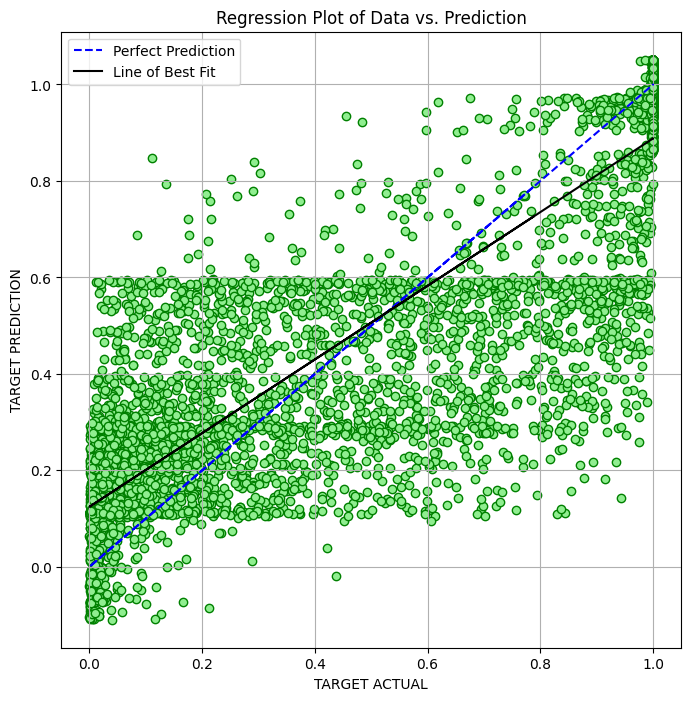

In [ ]:
weight, bias, prediction = nonpoly_regression(x_train_data,y_train_data,transform_np_2)
mse,rmse,mae,r = calculate_regression_metrics_3d(y_train_data, prediction)
c0,c1,_ = linear_regression(y_train_data,prediction)
print('Results for regression on TARGET (y)\n\n')
print(f'Weight(w) : {weight.squeeze()}\n')
print(f'Bias(b) : {bias}\n')
print(f'y_pred = <w,x> + b\n')
print(f'Coefficients of line of best fit: Slope = {c0} ; Intercept = {c1}')
print(f'y_pred = slope*y_train_data + intercept\n\n')

print(f"Training Results:")
print(f"Mean Squared Error (MSE) = {mse}")
print(f"Root Mean Squared Error(RMSE) = {rmse}")
print(f"Mean Absolute Error (MAE) = {mae}")
print(f"Pearson Correlation coefficient (r) = {r}\n\n")
plot_nonpoly_regression(y_train_data, prediction)

### Validation

Validation Results:

Mean Squared Error (MSE) = [0.03803466]
Root Mean Squared Error(RMSE) = [0.19502477]
Mean Absolute Error (MAE) = [0.13976265]
Pearson Correlation coefficient (r) = [0.87393592]




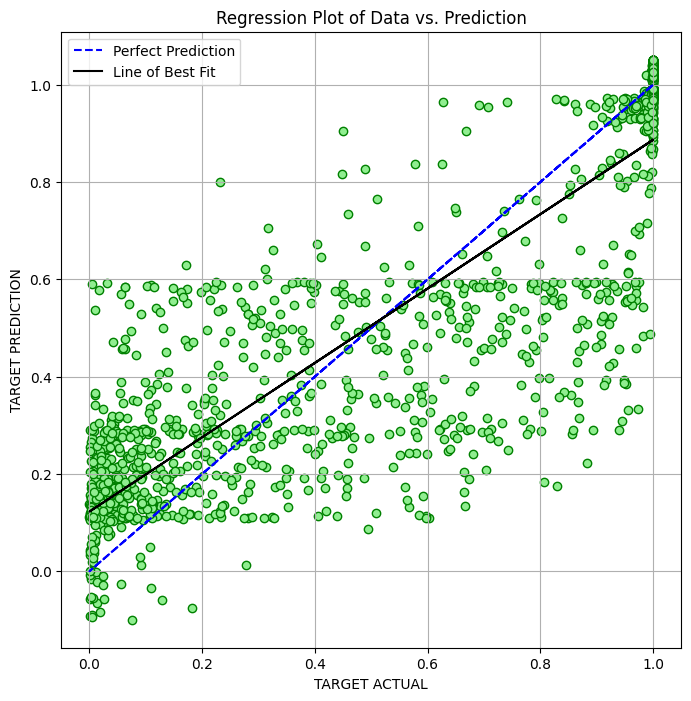

In [ ]:
weights = np.concatenate((bias, weight), axis = 0)
predictions = nonpoly_validate(x_test_data, weights, transform_np_2)
v_mse, v_rmse, v_mae, v_r = calculate_regression_metrics_3d(y_test_data, predictions)

print(f"Validation Results:\n")
print(f"Mean Squared Error (MSE) = {v_mse}")
print(f"Root Mean Squared Error(RMSE) = {v_rmse}")
print(f"Mean Absolute Error (MAE) = {v_mae}")
print(f"Pearson Correlation coefficient (r) = {v_r}\n\n")

plot_nonpoly_regression(y_test_data, predictions)